# Customer Membership

## Project Background

MyCommerce is a new e-commerce service. In MyCommerce there is a Tier Membership feature where each membership has different benefits and advantages namely: 
* Silver
* Gold
* Platinum

**Silver Membership** will get an 8% discount for every payment. In addition, you will also get other benefits such as Food Vouchers

**Gold Membership** will get a 10% discount for every payment. In addition, you will also get benefits from Silver and Online Motorcycle Taxi Vouchers

**Platinum Membership** will get a 15% discount for every payment. In addition, you will also get other benefits from Silver + Gold and Vacation Vouchers + Cashback max 30%

To predict user membership, MyCommerce uses a distance-based approach, more precisely it will use → Euclidean Distance. 

The way it works is by measuring or calculating the distance between:
* **Input** (user expense & income) with
* **Parameters** (expense & income) from each tier membership

![eucledian graph.png](<attachment:eucledian graph.png>)
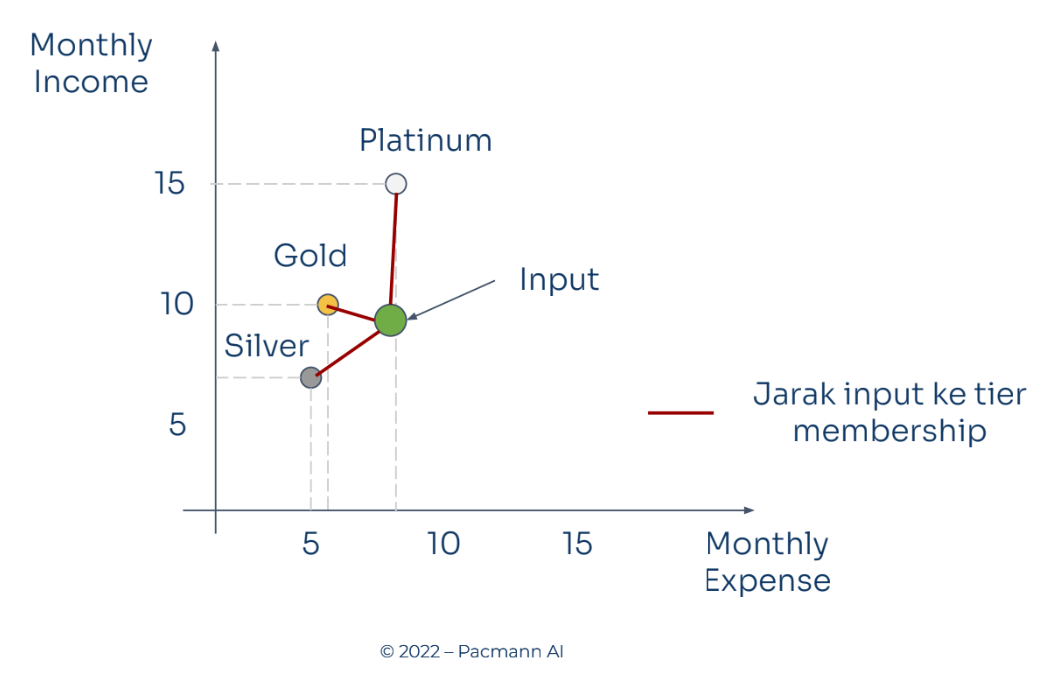

---
## Project Requirements

### Table 1: Membership Table 

| **Membership** | **Discount** |                     **Another Benefit**                     |
|:--------------:|:------------:|:-----------------------------------------------------------:|
|    Platinum    |      15%     | Silver Benefits + Gold Benefits + Holiday Voucher + Maximum Cashback 30% |
|      Gold      |      10%     | Silver Benefits + Online Motorcycle Taxi Voucher                        |
|     Silver     |      8%      | F&B Voucher                                             |

### Table 2: Membership Requirements Table 

| **Membership** | **Monthly Expense (Rp million)** | **Monthly Income (Rp million)** |
|:--------------:|:--------------------------:|:-------------------------:|
|    Platinum    |              8             | 15                        |
|      Gold      |              6             | 10                        |
|     Silver     |              5             | 7                         |

### Features List
- [ ] `show_benefit()` --> show all membership benefits (table 1)

- [ ] `show_requirements()` --> show all requirements to become a member (table 2)

- [ ] `predict_membership(monthly_expense, monthly_income)` --> predict which membership a user will be in based on the input parameters and each membership parameter

- [ ] `calculate_price(price_list)` --> calculate the final price to be paid, and then get a discount according to the membership provisions

## Project Solution

In [46]:
from tabulate import tabulate
from math import sqrt

### Create Membership Class 

Data that must be created Username and Membership for existing users:
- Sumbul: Platinum
- Ana: Gold
- Cahya: Platinum

In [ ]:
class Membership:
    # Class-level attribute
    data = {'Sumbul': 'Platinum', 'Ana': 'Gold', 'Cahya': 'Platinum'}    
    
    # Initialize attribute
    def __init__(self, username):
        self.username = username  # Instance attribute
        
    # Method to display membership benefits
    def show_benefit(self):
        '''
        This method will display the membership benefits in a table format

        Parameters: 
        None
        '''
        benefit = [
                    ['Membership', 'Discount', 'Another Benefits'],
                    ['Platinum', '15%', 'Benefit Silver + Gold + Voucher Liburan + Cashback max. 30%'],
                    ['Gold', '10%', 'Benefit Silver + Voucher Ojek Online'],
                    ['Silver', '8%', 'Voucher Makanan']
        ]

        benefit_table = tabulate(
                        benefit, 
                        headers='firstrow', 
                        tablefmt='fancy_grid',
                        stralign='center')

        print(benefit_table)

    # Method to display membership requirements
    def show_requirements(self):
        requirements = [
                        ['Membership', 'Monthly Expense (juta)', 'Monthly Income (juta)']
                        ['Platinum', 8, 15],
                        ['Gold', 6, 10],
                        ['Silver', 5, 7]
        ]

        requirements_table = tabulate(
                            requirements, 
                            headers='firstrow', 
                            tablefmt='fancy_grid',
                            numalign='right',
                            stralign='center'
        )

        print(requirements_table)
        
    # Method to predict membership using Euclidean distance
    def predict_membership(self, monthly_expense, monthly_income):
        '''
        This method will predict the membership based on the Euclidean distance
        
        Parameters:
        monthly_expense (int): The monthly expense of the user
        monthly_income (int): The monthly income of the user
        '''
        requirements = {
                        'Platinum': [8, 15],
                        'Gold': [6, 10],
                        'Silver': [5, 7]
        }

        # Initialize the minimum distance, corresponding membership variable, and calculation result dictionary
        min_distance = float('inf')
        min_membership = None
        result = {}

        for membership, [member_expense, member_income] in requirements.items():
            # Calculate Euclidean distance
            euclidean_distance = round(sqrt((monthly_expense - member_expense)**2 + (monthly_income - member_income)**2), 2)
            result.update({membership: euclidean_distance})

            # Store the minimum eucledian distance and corresponding membership
            if euclidean_distance < min_distance:
                min_distance = euclidean_distance
                min_membership = membership
        
        print(f'Predicted Euclidean distances for {self.username} are {result}')

        # Update the membership in the database
        self.data.update({self.username: min_membership})
    
    # Method to display the membership from the database
    def show_membership(self):
        '''
        This method will display the membership of the user

        Parameters:
        None
        '''
        if self.username in self.data: 
            print(f'{self.username} is a {self.data[self.username]} member')
        else:
            print(f'{self.username} is not a member yet')

    # Method to calculate the final price based on membership
    def calculate_price(self, price_list):
        '''
        This method will calculate the final price based on the membership

        Parameters:
        price_list (list): The list of prices of the items
        '''
        total_price = sum(price_list)

        match self.data[self.username]:
            case 'Platinum':
                final_price = total_price - (total_price * 0.15)
                print(f'{self.username} final price is Rp {final_price:,}')
            case 'Gold':
                final_price = total_price - (total_price * 0.10)
                print(f'{self.username} final price is Rp {final_price:,}')
            case 'Silver':
                final_price = total_price - (total_price * 0.08)
                print(f'{self.username} final price is Rp {final_price:,}')

---
## Test Case

### 1. Initialization and Display Membership

- Scenario: User is already in the database.

- Expected Output: Display the user's membership status.

In [48]:
member = Membership('Sumbul')

# Output: Sumbul is a Platinum member
member.show_membership()

Sumbul is a Platinum member


- Scenario: User is not in the database.

- Expected Output: Display that the user is not a member yet.

In [49]:
member = Membership('John')

# Output: John is not a member yet
member.show_membership()

John is not a member yet


### 2. Display Membership Benefits

- Scenario: Display the benefits table.

- Expected Output: Display the table with membership benefits.

In [50]:
member = Membership('Ana')

# Output: A table displaying membership benefits
member.show_benefit()

╒══════════════╤════════════╤═════════════════════════════════════════════════════════════╕
│  Membership  │  Discount  │                      Another Benefits                       │
╞══════════════╪════════════╪═════════════════════════════════════════════════════════════╡
│   Platinum   │    15%     │ Benefit Silver + Gold + Voucher Liburan + Cashback max. 30% │
├──────────────┼────────────┼─────────────────────────────────────────────────────────────┤
│     Gold     │    10%     │            Benefit Silver + Voucher Ojek Online             │
├──────────────┼────────────┼─────────────────────────────────────────────────────────────┤
│    Silver    │     8%     │                       Voucher Makanan                       │
╘══════════════╧════════════╧═════════════════════════════════════════════════════════════╛


### 3. Display Membership Requirements

- Scenario: Display the requirements table.

- Expected Output: Display the table with membership requirements.

In [51]:
member = Membership('Cahya')

# Output: A table displaying membership requirements
member.show_requirements()

╒══════════════╤══════════════════════════╤═════════════════════════╕
│  Membership  │   Monthly Expense (juta) │   Monthly Income (juta) │
╞══════════════╪══════════════════════════╪═════════════════════════╡
│   Platinum   │                        8 │                      15 │
├──────────────┼──────────────────────────┼─────────────────────────┤
│     Gold     │                        6 │                      10 │
├──────────────┼──────────────────────────┼─────────────────────────┤
│    Silver    │                        5 │                       7 │
╘══════════════╧══════════════════════════╧═════════════════════════╛


### 4. Predict Membership

- Scenario: Predict membership for a new user based on monthly expense and income.

- Expected Output: Display the predicted membership and update the database.

In [52]:
member = Membership('John')

# Output:
# Predicted Euclidean distances for John are {'Platinum': 3.61, 'Gold': 2.0, 'Silver': 5.0}
# John is predicted to be a Gold member
member.predict_membership(7, 12)

Predicted Euclidean distances for John are {'Platinum': 3.16, 'Gold': 2.24, 'Silver': 5.39}


In [53]:
# Show updated data
print(f'Updated member data: {member.data}')

Updated member data: {'Sumbul': 'Platinum', 'Ana': 'Gold', 'Cahya': 'Platinum', 'John': 'Gold'}


### 5. Calculate Final Price

- Scenario: Calculate the final price for a user based on their membership.

- Expected Output: Display the final price after applying the membership discount.

In [54]:
member = Membership('Sumbul')

price_list = [100000, 200000, 300000]

# Output: Sumbul final price is Rp 510,000.0
member.calculate_price(price_list)

Sumbul final price is Rp 510,000.0
